In [1]:
!pip install pandas matplotlib seaborn plotly bokeh kaleido

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
output_notebook()

# Load the dataset
df = pd.read_excel("AirQualityUCI.xlsx")
df = df.dropna(how="all")  # Drop empty rows
df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 4.8 MB/s eta 0:00:00


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


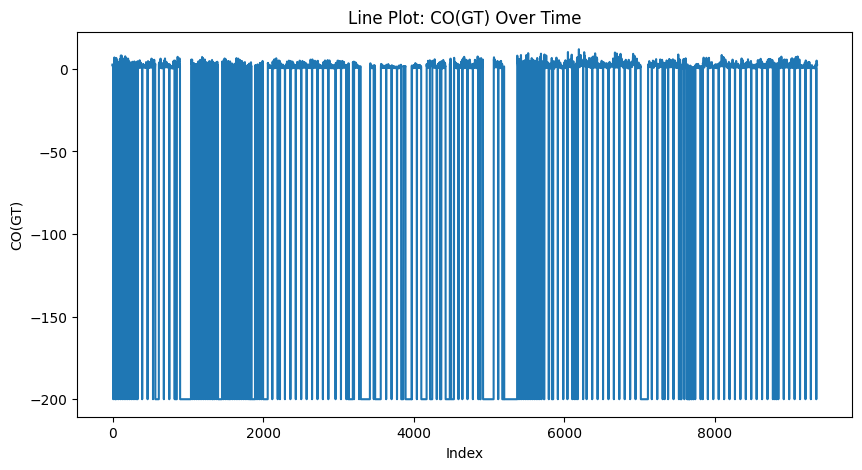

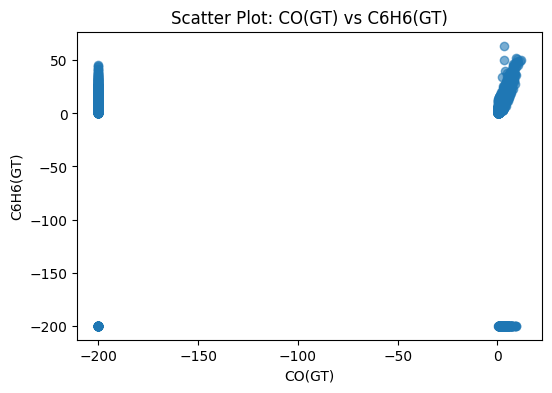

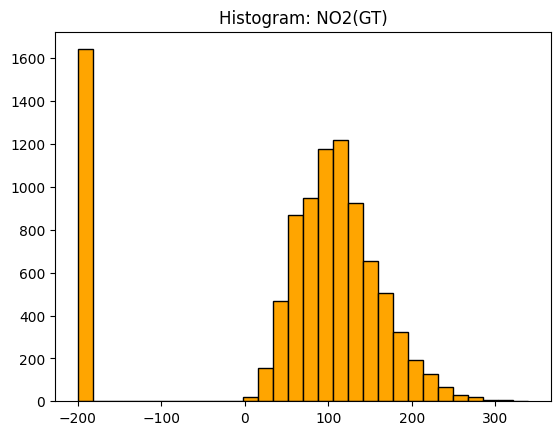

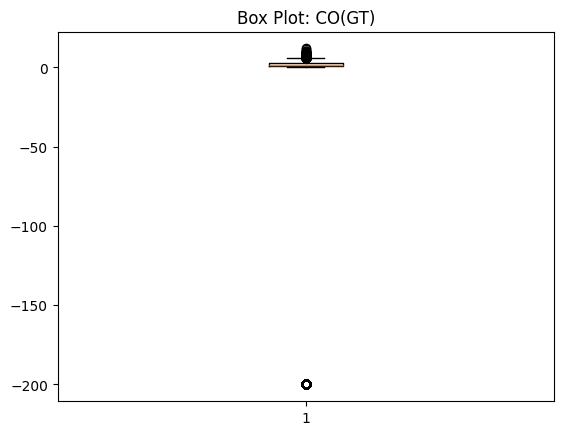

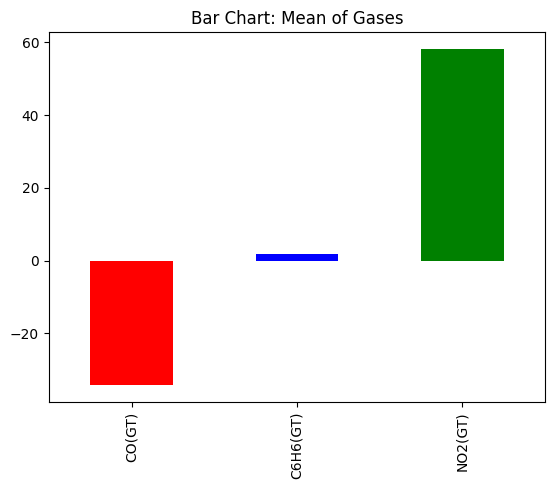

ValueError: When stacked is True, each column must be either all positive or all negative. Column 'T' contains both positive and negative values

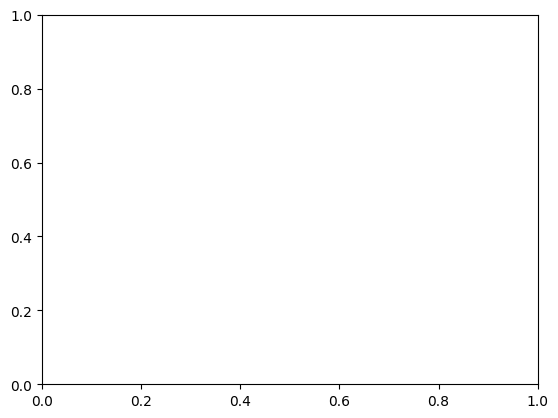

In [2]:
# 1. Line plot – CO(GT) over time
plt.figure(figsize=(10,5))
plt.plot(df.index, df['CO(GT)'])
plt.title("Line Plot: CO(GT) Over Time")
plt.xlabel("Index")
plt.ylabel("CO(GT)")
plt.show()

# 2. Scatter plot – CO(GT) vs C6H6(GT)
plt.figure(figsize=(6,4))
plt.scatter(df['CO(GT)'], df['C6H6(GT)'], alpha=0.6)
plt.title("Scatter Plot: CO(GT) vs C6H6(GT)")
plt.xlabel("CO(GT)")
plt.ylabel("C6H6(GT)")
plt.show()

# 3. Histogram – NO2(GT)
plt.hist(df['NO2(GT)'], bins=30, color='orange', edgecolor='black')
plt.title("Histogram: NO2(GT)")
plt.show()

# 4. Box plot – CO(GT)
plt.boxplot(df['CO(GT)'].dropna())
plt.title("Box Plot: CO(GT)")
plt.show()

# 5. Bar chart – Mean of gas readings
means = df[['CO(GT)','C6H6(GT)','NO2(GT)']].mean()
means.plot(kind='bar', color=['red','blue','green'])
plt.title("Bar Chart: Mean of Gases")
plt.show()

# 6. Area plot – Temperature & Humidity
df[['T','RH']].plot.area(alpha=0.5)
plt.title("Area Plot: Temperature and Humidity")
plt.show()

# 7. Pie chart – Average gas contribution
plt.pie(means, labels=means.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart: Average Gas Contribution")
plt.show()

# 8. Step plot – Temperature
plt.step(df.index[:100], df['T'][:100])
plt.title("Step Plot: Temperature")
plt.show()

# 9. Subplots – Compare gases
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].plot(df['CO(GT)']); ax[0].set_title("CO(GT)")
ax[1].plot(df['C6H6(GT)']); ax[1].set_title("C6H6(GT)")
ax[2].plot(df['NO2(GT)']); ax[2].set_title("NO2(GT)")
plt.show()

# 10. Horizontal bar chart
means.plot(kind='barh', color='skyblue')
plt.title("Horizontal Bar Chart: Mean Gases")
plt.show()


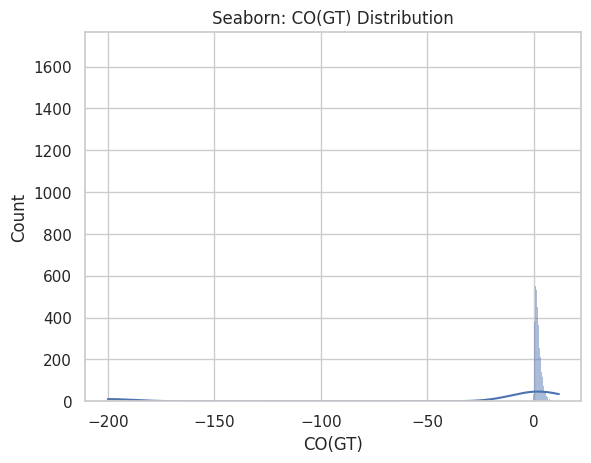

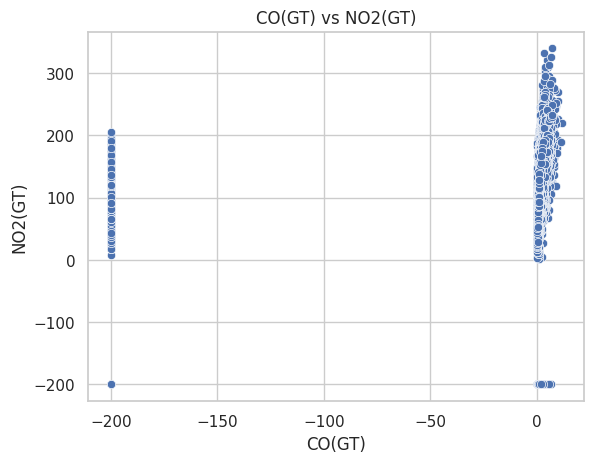

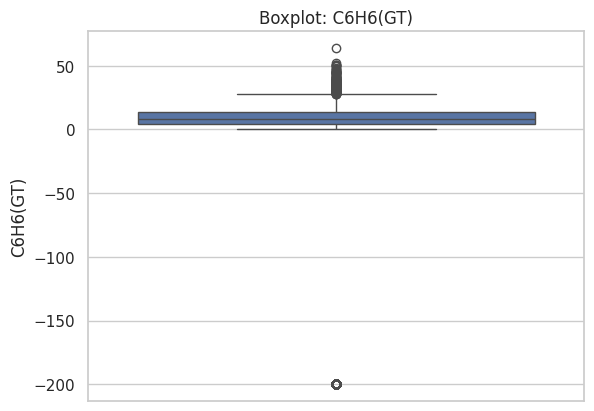

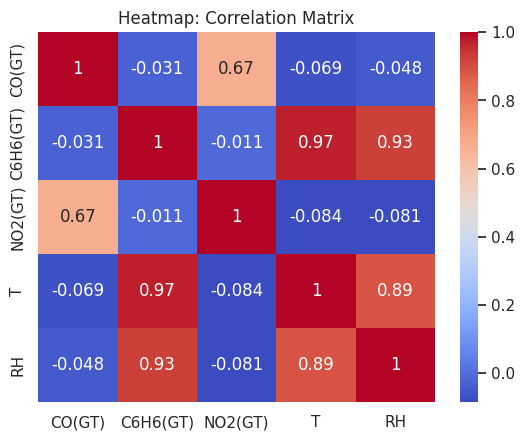

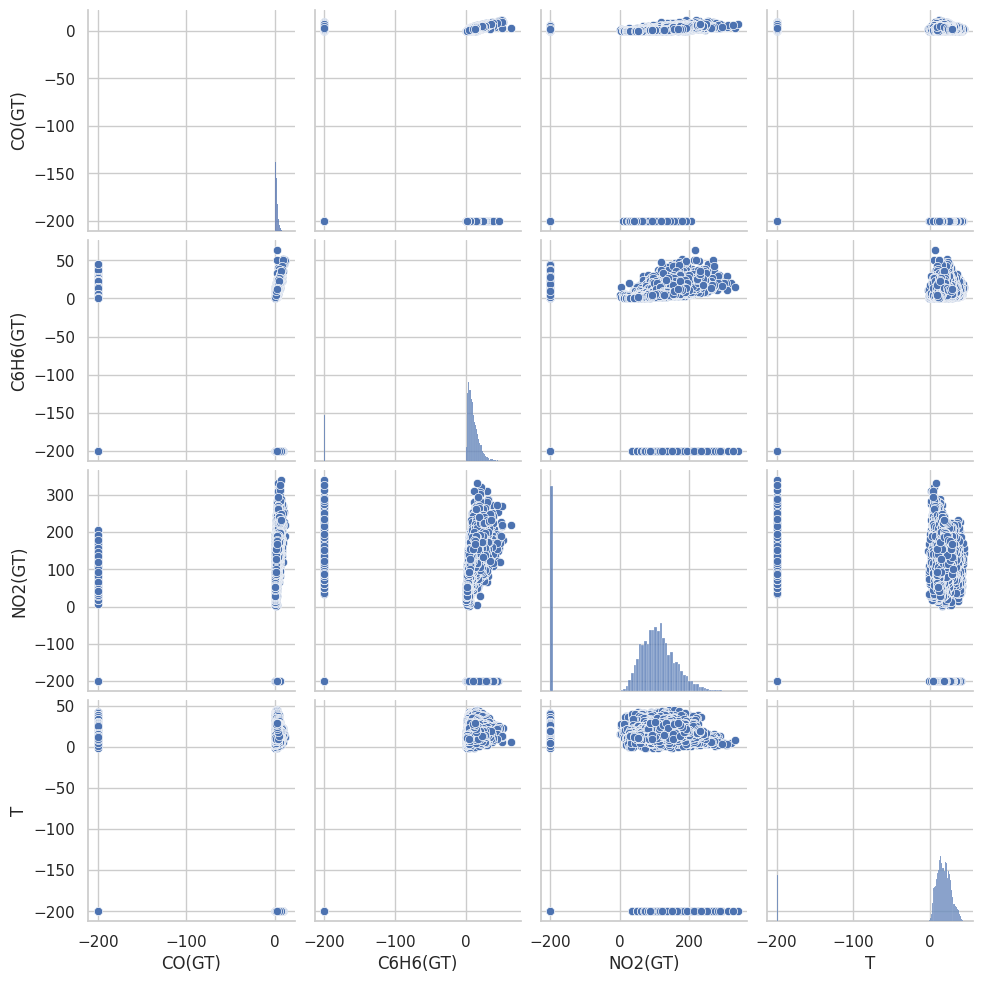

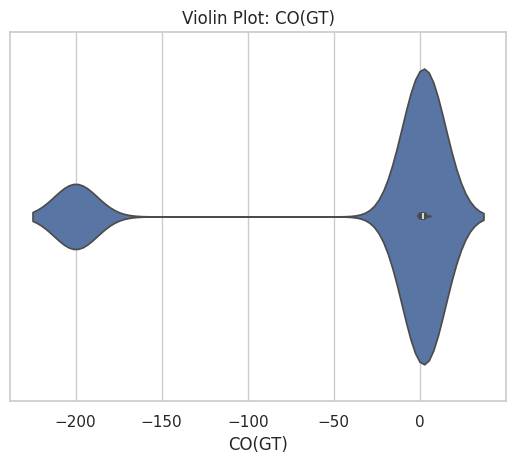

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be plac

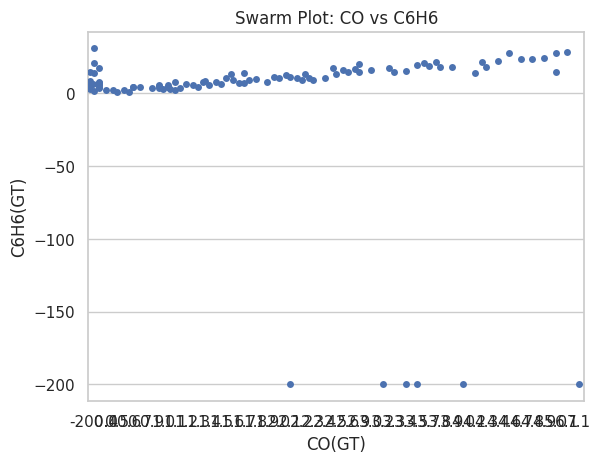

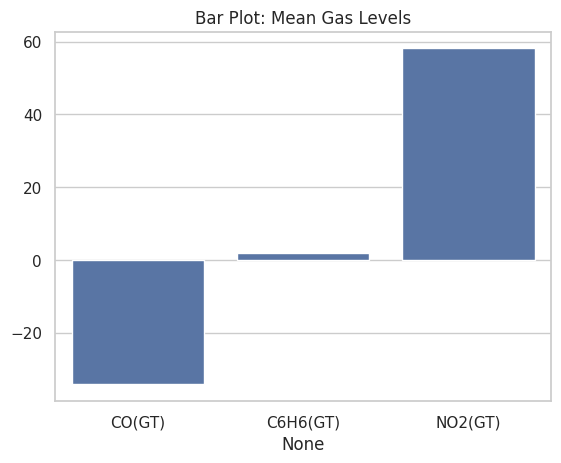

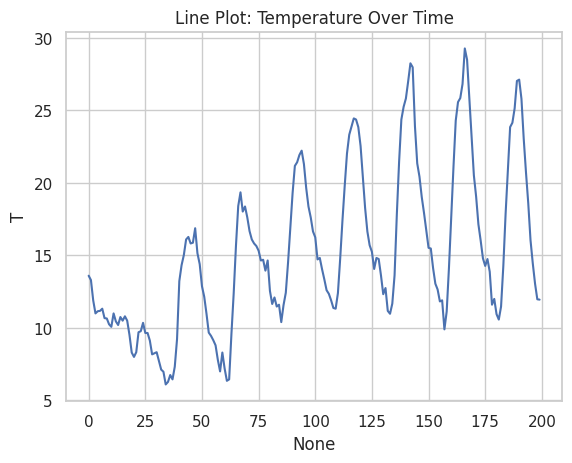

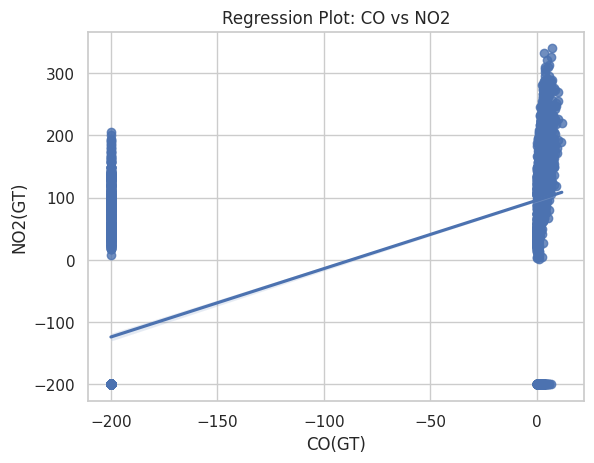

In [3]:
sns.set(style="whitegrid")

# 1. Histogram with KDE
sns.histplot(df['CO(GT)'], kde=True)
plt.title("Seaborn: CO(GT) Distribution")
plt.show()

# 2. Scatter plot
sns.scatterplot(x='CO(GT)', y='NO2(GT)', data=df)
plt.title("CO(GT) vs NO2(GT)")
plt.show()

# 3. Boxplot
sns.boxplot(y='C6H6(GT)', data=df)
plt.title("Boxplot: C6H6(GT)")
plt.show()

# 4. Heatmap
sns.heatmap(df[['CO(GT)','C6H6(GT)','NO2(GT)','T','RH']].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap: Correlation Matrix")
plt.show()

# 5. Pairplot
sns.pairplot(df[['CO(GT)','C6H6(GT)','NO2(GT)','T']])
plt.show()

# 6. Violin plot
sns.violinplot(x='CO(GT)', data=df)
plt.title("Violin Plot: CO(GT)")
plt.show()

# 7. Swarm plot
sns.swarmplot(x='CO(GT)', y='C6H6(GT)', data=df.sample(100))
plt.title("Swarm Plot: CO vs C6H6")
plt.show()

# 8. Bar plot
sns.barplot(x=means.index, y=means.values)
plt.title("Bar Plot: Mean Gas Levels")
plt.show()

# 9. Line plot
sns.lineplot(x=df.index[:200], y=df['T'][:200])
plt.title("Line Plot: Temperature Over Time")
plt.show()

# 10. Regression plot
sns.regplot(x='CO(GT)', y='NO2(GT)', data=df)
plt.title("Regression Plot: CO vs NO2")
plt.show()


In [4]:
import plotly.express as px

# 1. Line chart
px.line(df, y='CO(GT)', title="Plotly Line Chart: CO(GT)").show()

# 2. Scatter plot
px.scatter(df, x='CO(GT)', y='C6H6(GT)', title="Scatter Plot: CO vs C6H6").show()

# 3. Histogram
px.histogram(df, x='NO2(GT)', nbins=30, title="Histogram: NO2(GT)").show()

# 4. Box plot
px.box(df, y='T', title="Box Plot: Temperature").show()

# 5. Bar chart
px.bar(x=means.index, y=means.values, title="Bar Chart: Mean Gas Values").show()

# 6. Pie chart
px.pie(values=means.values, names=means.index, title="Pie Chart: Gas Contribution").show()

# 7. Area chart
px.area(df, y=['T','RH'], title="Area Chart: Temperature & Humidity").show()

# 8. Density contour
px.density_contour(df, x='CO(GT)', y='C6H6(GT)', title="Density Contour: CO vs C6H6").show()

# 9. Scatter matrix
px.scatter_matrix(df[['CO(GT)','C6H6(GT)','NO2(GT)','T']], title="Scatter Matrix").show()

# 10. 3D Scatter
px.scatter_3d(df, x='CO(GT)', y='C6H6(GT)', z='NO2(GT)', title="3D Scatter: Gases").show()


/usr/local/lib/python3.12/dist-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [6]:
import numpy as np  # ← FIX 1: Added numpy import
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

output_notebook()

source = ColumnDataSource(df)

# 1️⃣ Line Plot
p1 = figure(title="Line: CO(GT)", width=400, height=300)
p1.line(df.index[:200], df['CO(GT)'][:200], line_color="blue")

# 2️⃣ Scatter Plot (fixed deprecated warning)
p2 = figure(title="Scatter: CO vs C6H6", width=400, height=300)
p2.scatter(df['CO(GT)'], df['C6H6(GT)'], size=5, color="green", alpha=0.6)

# 3️⃣ Histogram
hist, edges = np.histogram(df['NO2(GT)'].dropna(), bins=30)
p3 = figure(title="Histogram: NO2(GT)", width=400, height=300)
p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="orange", line_color="white")

# 4️⃣ Line Plot for Temperature
p4 = figure(title="Temperature Over Time", width=400, height=300)
p4.line(df.index[:300], df['T'][:300], color="red")

# 5️⃣ Bar Chart
means = df[['CO(GT)','C6H6(GT)','NO2(GT)']].mean()
mean_data = pd.DataFrame({"gas": means.index, "value": means.values})
p5 = figure(x_range=mean_data['gas'], title="Bar Chart: Mean Gases", width=400, height=300)
p5.vbar(x='gas', top='value', width=0.5, source=ColumnDataSource(mean_data), color="teal")

# 6️⃣ Multiple Line Plot
p6 = figure(title="Temperature & RH", width=400, height=300)
p6.line(df.index[:200], df['T'][:200], color='blue', legend_label="Temp")
p6.line(df.index[:200], df['RH'][:200], color='green', legend_label="RH")

# 7️⃣ Step Plot
p7 = figure(title="Step: CO(GT)", width=400, height=300)
p7.step(df.index[:200], df['CO(GT)'][:200], color="purple")

# 8️⃣ Scatter Circle (fixed to scatter)
p8 = figure(title="C6H6 vs NO2", width=400, height=300)
p8.scatter(df['C6H6(GT)'], df['NO2(GT)'], color="purple", size=6)

# 9️⃣ Square Plot
p9 = figure(title="Humidity vs Temp", width=400, height=300)
p9.square(df['RH'][:200], df['T'][:200], color="orange", size=6, alpha=0.6)

# 🔟 Grid Layout for all plots
show(gridplot([[p1, p2], [p3, p4], [p5, p6], [p7, p8], [p9, None]]))


/tmp/ipython-input-450049090.py:49: BokehDeprecationWarning:

'square() method' was deprecated in Bokeh 3.4.0 and will be removed, use "scatter(marker='square', ...) instead" instead.

